# ANALYSIS OF LOAN DATA FROM PROSPER
## by RHODA OJETOLA

## Introduction
> This dataset consists of loan listings, borroers, lenders, borrowers rate, borrowers income e.t.c from the loan comapany Prosper Marketplace Inc. which was the first peer-to-peer lending marketplace in the United States established in 2005. Prosper ha s facilitated over 21 billon loans to over 1.3 millon people. In this project, The data set would be used to explore borrowers and investors data to find and gain insights and patterns to borrowers on the the prospers' platform. Here are some of the columns that will be featured in this analysis
      
> - BorrowerAPR The Borrower's Annual Percentage Rate (APR) for the loan.
> - BorrowerRate The Borrower's interest rate for this loan. 
> - LenderYield	The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
> - ProsperRating (Alpha)	The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
> - ProsperScore A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
> - ListingCategory	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
> - CreditScoreRangeUpper The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 
> - CurrentDelinquencies Number of accounts delinquent at the time the credit profile was pulled.
> - IsBorrowerHomeowner	A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
> - DebtToIncomeRatio	The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
> - IncomeRange	The income range of the borrower at the time the listing was created.
> - StatedMonthlyIncome	The monthly income the borrower stated at the time the listing was created.
> - LoanOriginalAmount	The origination amount of the loan.
> - Investors	The number of investors that funded the loan.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr
import seaborn as sb

%matplotlib inline

### Data Assessment
> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loan_df = pd.read_csv("prosperLoanData.csv")

In [3]:
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan_df.sample(4)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
84513,E5EA359183111277188EB5C,997587,2013-10-22 21:21:58.670000000,NaN,60,Current,NaN,0.20808,0.1840,0.1740,...,-48.57,0.0,0.00,0.00,0.0,1.0,0,0,0.0,48
85032,3FE8338459722257539AF18,110593,2007-03-13 15:45:37.470000000,D,36,Chargedoff,2008-02-19 00:00:00,0.25707,0.2495,0.2295,...,-23.90,0.0,4205.71,4205.71,0.0,1.0,1,0,0.0,73
82779,E17B3591974515260B8CF55,946457,2013-10-09 15:57:58.967000000,NaN,36,Current,NaN,0.17090,0.1349,0.1249,...,-48.82,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
64198,E4BB3588985520024E22273,909037,2013-09-18 14:27:49.427000000,NaN,36,Current,NaN,0.27623,0.2379,0.2279,...,-60.39,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1


In [5]:
# find the shape of the dataframe using .shape
print(loan_df.shape)
print(f"\nThe dataframe consists of {loan_df.shape[0]} rows and {loan_df.shape[1]} columns.")

(113937, 81)

The dataframe consists of 113937 rows and 81 columns.


In [6]:
# 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Some variables have null values and also some categorical variables are not in the correct data types 

In [7]:
loan_df.duplicated().sum()

0

**There are duplicate rows in the data set**

In [8]:
# EXPLORE CERTAIN FEATURES IMPORTANT TO THE ANALYSIS
print(loan_df["EmploymentStatus"].unique())
print(loan_df["IncomeRange"].value_counts())
print(loan_df["ProsperRating (Alpha)"].unique())
print(loan_df["ProsperScore"].max())
print(loan_df["ProsperScore"].min())

['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan
 'Not employed' 'Part-time' 'Retired']
$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64
[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']
11.0
1.0


In [9]:
loan_df.loc[:, ["BorrowerAPR", "BorrowerRate", "LenderYield", "StatedMonthlyIncome"]].describe()

,BorrowerAPR,BorrowerRate,LenderYield,StatedMonthlyIncome
count,113912.000000,113937.000000,113937.000000,1.139370e+05
mean,0.218828,0.192764,0.182701,5.608026e+03
std,0.080364,0.074818,0.074516,7.478497e+03
min,0.006530,0.000000,-0.010000,0.000000e+00
25%,0.156290,0.134000,0.124200,3.200333e+03
50%,0.209760,0.184000,0.173000,4.666667e+03
75%,0.283810,0.250000,0.240000,6.825000e+03
max,0.512290,0.497500,0.492500,1.750003e+06


In [10]:
loan_df["ProsperRating (Alpha)"].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [11]:
loan_df["ListingCategory (numeric)"].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [12]:
loan_df["ProsperScore"].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [13]:
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Most variables are numeric in nature, but some variables like LoanStatus, ListingCategory, EmploymentStatus, IsBorrowerHomeOwner and IncomeVerifiable are nominal variables and some the variables ProsperRating (Alpha), IncomeRange, Term and ProsperScore are ordered factor variables with the following levels.
>- ProsperRating (Alpha): A proprietary rating developed by Prosper to analyze a listing level of risk. It folows this order **AA-A-B-C-D-E-HR (from lowest risk to the highest risk)**
>- IncomeRange: The income range of the borrower at the time the listing was created. This variable follows this order from the lowest **0, 1-24,999, 25,000-49,999, 50,000-74,999, 75,000-99,999, 100,000+ all in dollars**.
>- Term: The length of the loan expressed in months, this means the time the borrower has to payback. From *12, 36, 60*.
>- ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-11, with 11 being the best, or lowest risk score.
>- CreditScore

### What is/are the main feature(s) of interest in your dataset.
> - check for the features that could predict Borrower ARP, Borrowers Rate and Prosper Rating.
>- Do these all the variables mentioned above work together


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think  "Term", "BorrowerAPR", "ProsperRating (Alpha)","ProsperScore","ListingCategory","EmploymentStatus, "IsBorrowerHomeowner", "DebtToIncomeRatio" and "StatedMonthlyIncome" will best predict Borrower ARP, Borrowers Rate and loan yield and "MonthlyLoanPayments", "Recommendations", "DelinquenciesLast7Years", IncomeRange, IsBorrowerHomeOwner and  "DebtToIncomeRatio" will best predict proper rating and prosper score

### Data Cleaning 
> Now that the dataset has been assessed and the features of interest have been clearly stated, the next and last step in the wrangling process is data cleaning. Here we would resolved missing values, drop columns that are not of interest, resolve incorrect data types and replace values where necessary

In [14]:
# Create a copy of the original dataset
loan_clean = loan_df.copy()

#### Dropping columns that are not needed for this analysis
##### Define: loop through the columns in the data frame and drop columns that are not in the col_wanted list with the pandas method drop.
##### Code

In [15]:
# 
# DROP COLUMNS THAT WON'T BE USEFUL IN THIS ANALYSIS
col_wanted = ["ListingNumber", "ListingCreationDate", "Term", "BorrowerAPR", "LoanOriginalAmount",
              "BorrowerRate","LenderYield", "ProsperRating (Alpha)","ProsperScore","ListingCategory (numeric)", 
             "EmploymentStatus", "EmploymentStatusDuration", "IsBorrowerHomeowner", 
              "DebtToIncomeRatio","IncomeRange","IncomeVerifiable","StatedMonthlyIncome", "LoanOriginalAmount"
             "MonthlyLoanPayment", "Investors", 
              "CreditScoreRangeUpper", "AmountDelinquent", "CurrentDelinquencies", "LoanStatus"]

for column in loan_clean.columns:
    if column not in col_wanted:
        loan_clean.drop([column], axis=1, inplace=True)
loan_clean.shape 

(113937, 22)

##### Test

In [16]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   Term                       113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   ProsperRating (Alpha)      84853 non-null   object 
 8   ProsperScore               84853 non-null   float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  EmploymentStatus           111682 non-null  object 
 11  EmploymentStatusDuration   106312 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  CreditScoreRangeUpper      11

#### Dropping all missing values
##### Define: All rows with missing values will be dropped from the dataframe 
##### Code

In [17]:
loan_clean.dropna(axis=0, inplace=True)

##### Test

In [18]:
loan_clean.isna().sum().sum()

0

#### Replace "Not Employed" in IncomeRange column with "0" 
##### Define: use the replace method to replace not employed with 0 in the Income range column
##### Code

In [19]:
loan_clean["IncomeRange"].replace(to_replace="Not employed", value="$0", inplace=True)

##### Test

In [20]:
loan_clean["IncomeRange"].unique()

array(['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999',
       '$1-24,999', '$0'], dtype=object)

#### Values in listingcategory column contains numbers that represents what each loan is for. 
##### Define: Replace each number with their original meaning 
##### Code

In [21]:
replace_dict ={0: "Not Available", 1:"Debt Consolidation", 2:"Home Improvement", 3:"Business", 4:"Personal Loan",
 5:"Student Use", 6:"Auto", 7:"Other",8:"Baby&Adoption", 9:"Boat", 10:"Cosmetic Procedure", 
 11:"Engagement Ring", 12:"Green Loans", 13:"Household Expenses",14:"Large Purchases", 15:"Medical/Dental",
 16:"Motorcycle", 17:"RV", 18:"Taxes", 19:"Vacation", 20:"Wedding Loans"}

loan_clean["ListingCategory (numeric)"].replace(replace_dict, inplace=True)
# rename the column so it wont have numeric in its name.
loan_clean.rename({"ListingCategory (numeric)":"ListingCategory"}, inplace=True, axis=1)

##### Test

In [22]:
loan_clean["ListingCategory"].unique()

array(['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other',
       'Household Expenses', 'Auto', 'Medical/Dental', 'Wedding Loans',
       'Vacation', 'Taxes', 'Baby&Adoption', 'Engagement Ring',
       'Business', 'Large Purchases', 'Boat', 'RV', 'Not Available',
       'Cosmetic Procedure', 'Student Use', 'Green Loans'], dtype=object)

#### ordinal categorical data types are in the wrong data type
##### Define: Convert ProsperRating, Term, ProsperScore and IncomeRange into ordered categorical types using pandas.api.types.CategoricalDtype
##### Code

In [23]:

order_dict = {'ProsperRating (Alpha)': ["AA", "A", "B", "C", "D", "E", "HR"],
                    'Term': [12, 36, 60],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8,9,10, 11],
                   "IncomeRange":["$0", "$1-24,999", '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}

for key in order_dict:
    order_cat = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = order_dict[key])
    loan_clean[key] = loan_clean[key].astype(order_cat)

##### Test

In [24]:
loan_clean.dtypes

ListingNumber                  int64
ListingCreationDate           object
Term                        category
LoanStatus                    object
BorrowerAPR                  float64
BorrowerRate                 float64
LenderYield                  float64
ProsperRating (Alpha)       category
ProsperScore                category
ListingCategory               object
EmploymentStatus              object
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
CreditScoreRangeUpper        float64
CurrentDelinquencies         float64
AmountDelinquent             float64
DebtToIncomeRatio            float64
IncomeRange                 category
IncomeVerifiable                bool
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
Investors                      int64
dtype: object

#### ListingCategory and EmploymentStatus are meant to be in categorical datatypes
##### Define: convert each column using astype method
##### Code

In [25]:
loan_clean["ListingCategory"] = loan_clean["ListingCategory"].astype("category")
loan_clean["EmploymentStatus"] = loan_clean["EmploymentStatus"].astype("category")

##### Test

In [26]:
loan_clean.dtypes

ListingNumber                  int64
ListingCreationDate           object
Term                        category
LoanStatus                    object
BorrowerAPR                  float64
BorrowerRate                 float64
LenderYield                  float64
ProsperRating (Alpha)       category
ProsperScore                category
ListingCategory             category
EmploymentStatus            category
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
CreditScoreRangeUpper        float64
CurrentDelinquencies         float64
AmountDelinquent             float64
DebtToIncomeRatio            float64
IncomeRange                 category
IncomeVerifiable                bool
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
Investors                      int64
dtype: object

#### ListingNumber is mean to be a string object datatype and ListingCreationDate is meant to datetime object
##### Define: Convert each column using astype method and pandas to_datetime function
##### Code

In [27]:
loan_clean["ListingNumber"] = loan_clean["ListingNumber"].astype("str")
loan_clean["ListingCreationDate"] = pd.to_datetime(loan_clean["ListingCreationDate"])

##### Test

In [28]:
loan_clean.dtypes

ListingNumber                       object
ListingCreationDate         datetime64[ns]
Term                              category
LoanStatus                          object
BorrowerAPR                        float64
BorrowerRate                       float64
LenderYield                        float64
ProsperRating (Alpha)             category
ProsperScore                      category
ListingCategory                   category
EmploymentStatus                  category
EmploymentStatusDuration           float64
IsBorrowerHomeowner                   bool
CreditScoreRangeUpper              float64
CurrentDelinquencies               float64
AmountDelinquent                   float64
DebtToIncomeRatio                  float64
IncomeRange                       category
IncomeVerifiable                      bool
StatedMonthlyIncome                float64
LoanOriginalAmount                   int64
Investors                            int64
dtype: object

## Univariate Exploration

> Univariate exploration is an exploration involving one variable(numerical or categorical). In this section, we investigate distributions of individual variables and also analyze patterns present in each variable. 

#### Question: What is the Distribution of Borrower APR Variable?
#### Visualization

In [29]:
def histogram(colname, size, xticks=True, bin=True):
    """To plot the histogram of BorrowersAPR, BorrowerRate and 'Lender's Yield"""
    bins = np.arange(0, loan_clean[colname].max()+0.0005, size)
    plt.figure(figsize=[8,5])
    if bin:
        sb.histplot(loan_clean[colname], bins=bins)
    else:
         sb.histplot(loan_clean[colname])
    plt.title(f"Distribution of {colname}")
    if xticks:
        ticks = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.35, 0.40]
        plt.xticks(ticks)

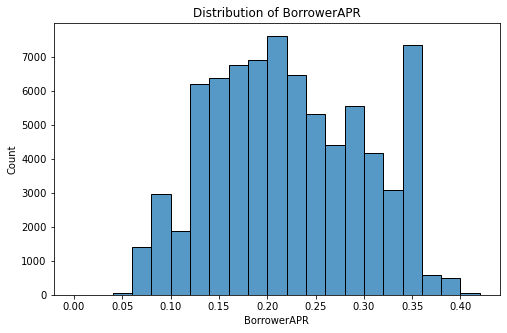

In [30]:
histogram("BorrowerAPR",size =0.02)

#### Observation
The distribution of the BorrowerAPR is bimodal(there are two peaks in the distribution both are roughly above 7000), with bin edges of 0.02, being bimodal this means there a high probability of it having more than one mode in its distribution.

#### Distribution of BorrowersRate and LenderYield
#### Visualization

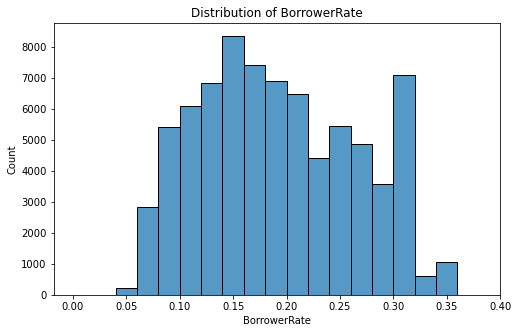

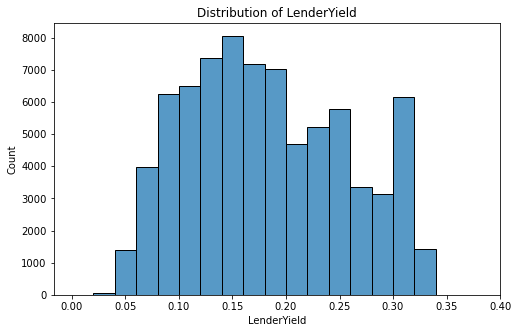

In [31]:
#plt.figure(figsize=[20, 5])
#plt.subplot(1,2, 1)
ticks =[0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.33,0.35]
histogram("BorrowerRate", size=0.02)
#plt.subplot(1, 2, 2)
histogram("LenderYield", size=0.02)

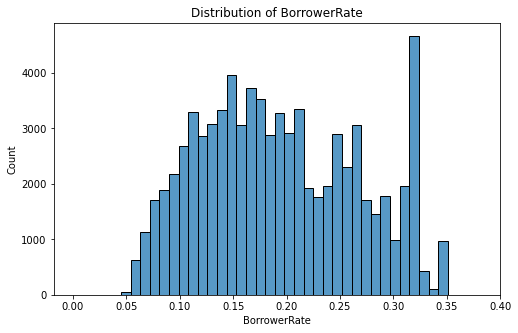

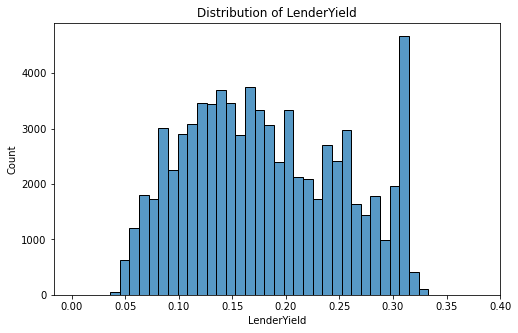

In [32]:
#investigating further 
histogram("BorrowerRate", size=0.009)
histogram("LenderYield", size=0.009)

#### Observation
The Distribution of BorrowerRate(Interest Rate) and LenderYiels seems to be bimodal. BorrowerRate has huge spike between 0.31 and 0.32. LenderYield also has its highest peak between 0.30 TO 0.31

#### Distribution of Investors

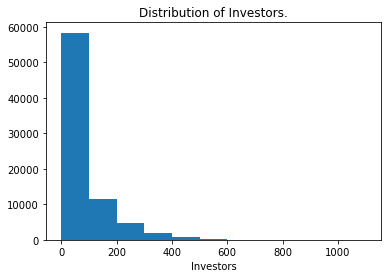

In [33]:
bins =np.arange(0, loan_clean["Investors"].max()+5, 100)
plt.hist(x=loan_clean["Investors"], bins=bins)
plt.xlabel("Investors")
plt.title("Distribution of Investors.");

the distribution of appeared to be right skewwed.


#### Distribution of Credit Score

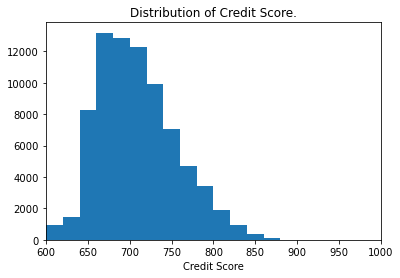

In [36]:
bins =np.arange(0, loan_clean["CreditScoreRangeUpper"].max()+5, 20)
plt.hist(data=loan_clean, x="CreditScoreRangeUpper", bins=bins)
plt.xlabel("Credit Score")
plt.title("Distribution of Credit Score.")
plt.xlim((600, 1000));

The distribution of credit scores appears to symmetric and unimodal

####  Distribution of StatedMonthlyIncome
#### Visualization

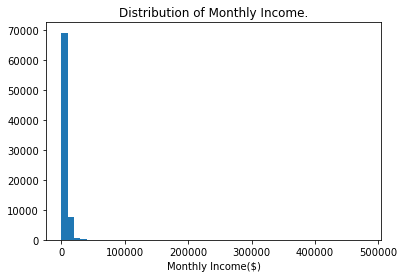

In [37]:

bins =np.arange(0, loan_clean["StatedMonthlyIncome"].max()+5, 10000)
plt.hist(data=loan_clean, x="StatedMonthlyIncome", bins=bins)
plt.xlabel("Monthly Income($)")
plt.title("Distribution of Monthly Income.");

The distribution can not be seen clearly and it is also looking skewed to the right. For this reason it is probably a good idea to transform the x axis with a log scale and also since most of the values are below 100000. it will be a good idea to drop values that are way beyound 100000 as outliers

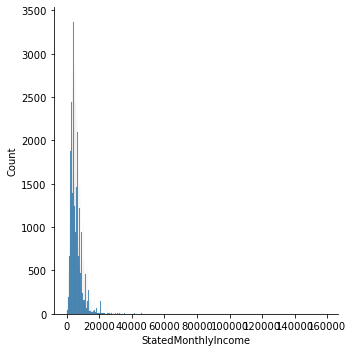

In [38]:
# Dropping rows with ouliers
rows_above_300k = loan_clean[loan_clean["StatedMonthlyIncome"] > 300000].index
loan_clean.drop(rows_above_300k, axis=0, inplace=True)
sb.displot(data=loan_clean, x="StatedMonthlyIncome");

The data is still postively skewed as only a few number of borrowers earn above 100000. It will be a good idea to transform the Stated Monthly Income to a log scale

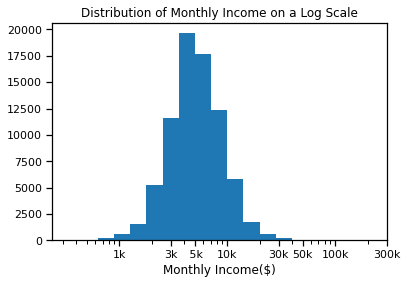

In [39]:
sb.set_context("notebook")
bins = 10 ** np.arange(2.5, 5+0.1, 0.15)
plt.hist(data=loan_clean, x="StatedMonthlyIncome", bins=bins)
ticks = [1000, 3000, 5000, 10000, 30000,50000, 100000, 300000]
# Convert ticks into string values, to be displayed dlong the x-axis
labels = ['1k', "3k"," 5k", "10k", "30k", "50k", "100k", "300k"]
plt.xscale("log")
plt.xticks(ticks, labels)
plt.xlabel("Monthly Income($)")
plt.title("Distribution of Monthly Income on a Log Scale");

#### Observation 
When plotted on a log scale the "StatedMonthlyIncome" is unimodal with its peak around 3500 to 5000.

#### Distribution of Debt to income Ratio

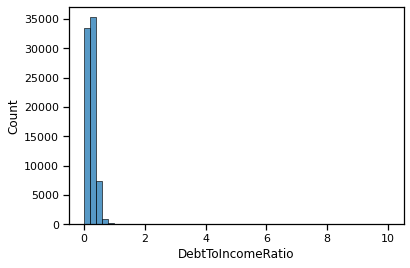

In [40]:
sb.histplot(loan_clean["DebtToIncomeRatio"], bins = 50);

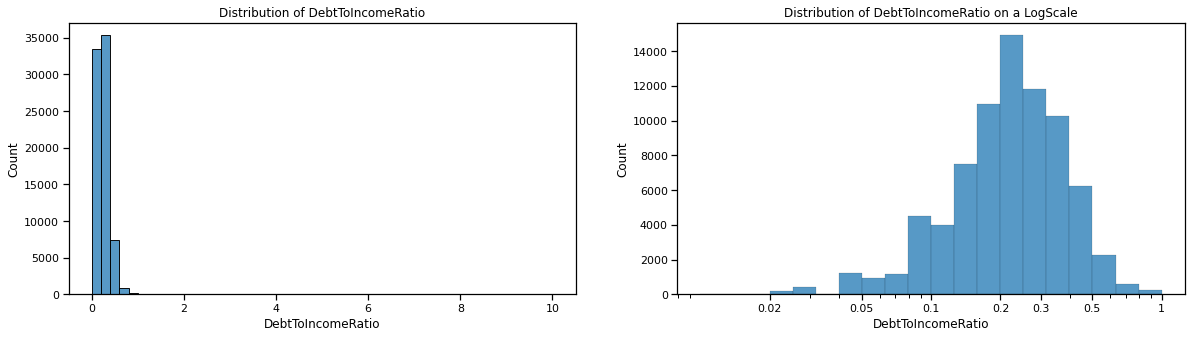

In [41]:

plt.figure(figsize=[20, 5])
plt.subplot(1,2,1)
sb.histplot(loan_clean["DebtToIncomeRatio"], bins = 50)
plt.title("Distribution of DebtToIncomeRatio")
plt.subplot(1,2,2)
bins = 10 ** np.arange(-2, 0+0.1, 0.1)
ticks = [0.02, 0.05,0.1, 0.2,0.3,0.5, 1]
sb.histplot(loan_clean["DebtToIncomeRatio"], bins=bins)
plt.title("Distribution of DebtToIncomeRatio on a LogScale")
plt.xscale("log")
plt.xticks(ticks, ticks);

#### Observation
The DebtToIncomeRatio distribution is a right skewed distribution. Which ploted on a log scale showed a unimodal distribution, with his peak between 0.2 and 0.25.

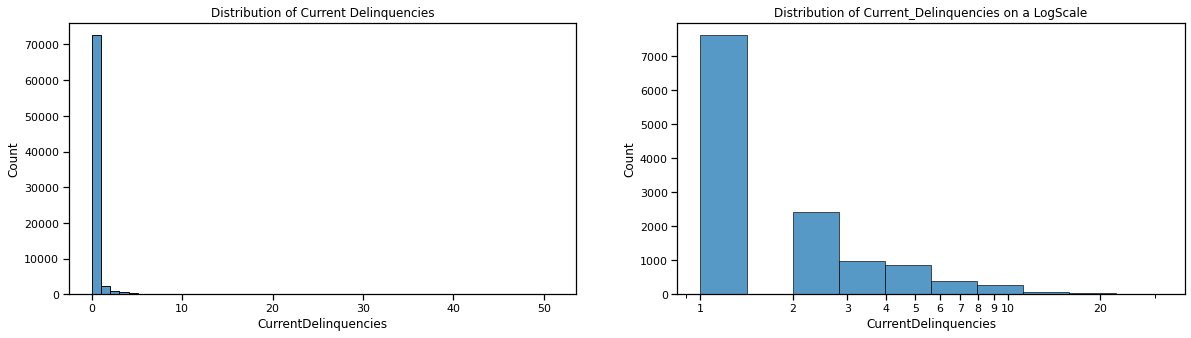

In [42]:

plt.figure(figsize=[20, 5])
plt.subplot(1,2,1)
sb.histplot(loan_clean["CurrentDelinquencies"], bins = 50)
plt.title("Distribution of Current Delinquencies")
plt.subplot(1,2,2)
bins = 10 ** np.arange(0, 1.5+0.1, 0.15)
ticks = [1,2,3,4,5,6,7,8,9, 10, 20]
sb.histplot(loan_clean["CurrentDelinquencies"], bins=bins)
plt.title("Distribution of Current_Delinquencies on a LogScale")
plt.xscale("log")

plt.xticks(ticks, ticks);

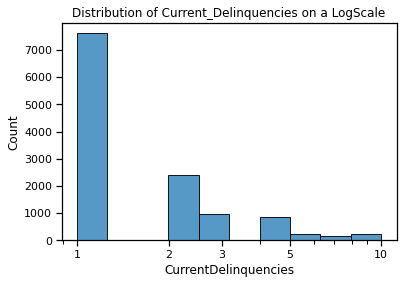

In [43]:
# investigating Further 
bins = 10 ** np.arange(0, 1+0.1, 0.1)
ticks = [1,2, 3, 5, 10]
sb.histplot(loan_clean["CurrentDelinquencies"], bins=bins)
plt.title("Distribution of Current_Delinquencies on a LogScale")
plt.xscale("log")
plt.xticks(ticks, ticks);

#### Observation
The distribution of Current Delinqucies seemed to be postively skewed, After further investigation and plotting on a log scale, the mode of the didtribution is at 1 this means that most borrowers have 1 loan delinquent.

#### Count of Borrowers By ProsperRating
#### Visualiztion

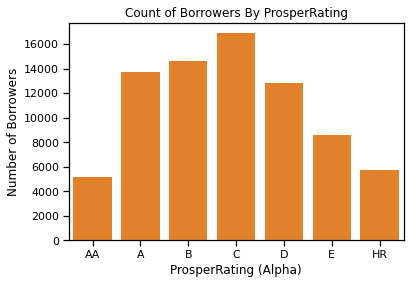

In [44]:

base_color = sb.color_palette()[1]
sb.countplot(data=loan_clean, x='ProsperRating (Alpha)', color=base_color)
plt.ylabel("Number of Borrowers")
plt.title("Count of Borrowers By ProsperRating");

#### Observation
From the bar chart created with seaborn countplot Most borrowers have a ProperRating of C the value for C is above 16000. having a ProsperRating of C means that Estimated Average Loss Rate 6.0 to 8.99%(these values are gotten from the Prosper website), it also means the loan level risk for the investor(Lender) to consider before investing in the loan. Most borrowers listing in the data have a fair amount of risk.

#### Number of Borrowers By income Range

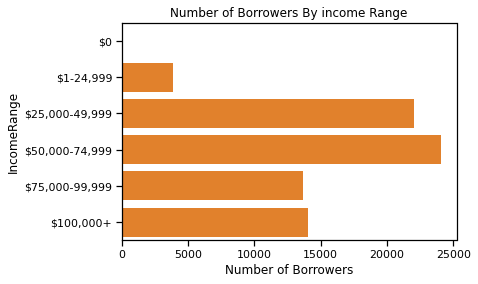

In [45]:
g = sb.countplot(data=loan_clean, y='IncomeRange', color=base_color)
g.set(title="Number of Borrowers By income Range", xlabel="Number of Borrowers");

#### Observation
>From the seaborn countplot above, most borrowers earn above 25,000 dollars, with \$50,000-74,999 having a count of over 23,000  borrowers being the income range most borrowers earn. 
The number of borrowers who earn \$75,000 to \$99,999 and \$100,000 are above 13000 each.

#### Count of Prosper score

In [46]:
loan_clean["ProsperScore"].value_counts()

8     11543
6     11305
4     11162
7      9964
5      8770
9      6624
3      6579
2      4821
10     4638
11     1412
1       721
Name: ProsperScore, dtype: int64

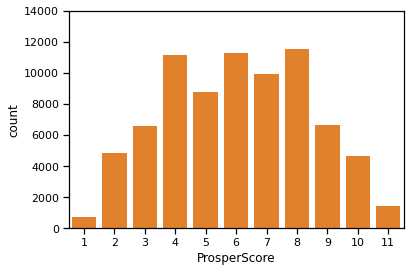

In [47]:
g = sb.countplot(data=loan_clean, x='ProsperScore', color=base_color)
g.set(ylim=(0,14000));

#### Observation
The prosper Score 4, 6, 8 seems to have a close number in count of borrowers. There is also a small number of of borrowers listings that are associated with lowest risk which is Prosper score 11 but the listings with the highest risk (ProsperScore 1) has the lowest number of borrowers' listings.

#### The Count of Borrowers in Percentage By ListingCategory.
#### Visualization

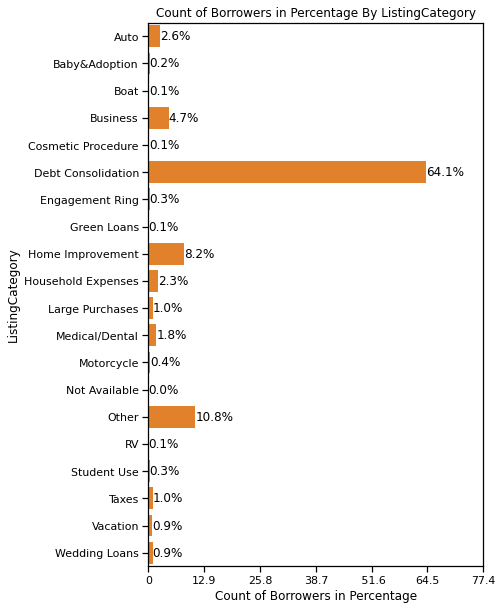

In [48]:
plt.figure(figsize=[6, 10])
g = sb.countplot(data=loan_clean, y="ListingCategory", color=base_color)
ticks= [0, 10000, 20000, 30000, 40000, 50000, 60000]
labels = ["0","12.9", "25.8","38.7"," 51.6", "64.5", "77.4"]
g.set(title="Count of Borrowers in Percentage By ListingCategory", xticks=ticks, xticklabels=labels, 
      xlabel="Count of Borrowers in Percentage")
#plt.xticks(ticks=[0, 10000, 20000, 30000, 40000, 50000],label=["12.9", "25.8","38.7"," 51.6", "64.5"])
# 77.4, 90.3])
#plt.xlim((0, 77543));
total_count=len(loan_clean)
count = loan_clean["ListingCategory"].value_counts().sort_index()
for listing in range(len(count)):
    category = count[listing]
    percent = ((category/total_count)*100)
    percent_str = "{:0.1f}%".format(percent)
    plt.text(category+1, listing, percent_str, va="center", color="black")
#plt.xticks(ticks=[12.9, 25.8,38.7, 51.6, 64.5,77.4, 90.3],label=[12.9, 25.8,38.7, 51.6, 64.5,77.4, 90.3])

#### Observation
I created a bar chart and alao added text to bar chart to show the percentages borrowers in each listing category, Most borrowers reason for getting a loan is Debt Consolidation with 64.1%.


#### Number of Borrowers by Home Ownernship
#### Visualizaton

True     42055
False    35484
Name: IsBorrowerHomeowner, dtype: int64

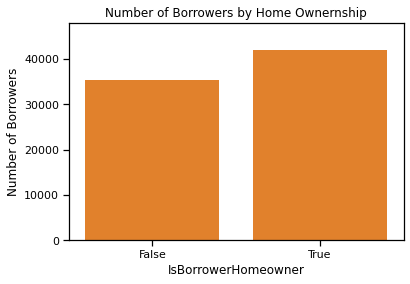

In [49]:
g = sb.countplot(data=loan_clean, x="IsBorrowerHomeowner", color=base_color)
g.set(title="Number of Borrowers by Home Ownernship", ylabel="Number of Borrowers", ylim=(0, 48000));
loan_clean["IsBorrowerHomeowner"].value_counts()

From the bar plot we can see that most borrowers are home owners but the difference between borrowers who own a home and those who don't is less than 10,000.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions of BorrowerAPR, BorrowerRate and LenderYield were bimodal with huge spikes towards upper values. The Prosper rating has the highest frequency at C and most borrowers in the data earn above 25,000 dollars and only one borrowers is earning 1 dollar. The didtribution of Credit Scores appears to symmetric and the distribution of Investors are Left Skewed.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were some unusal distributions in StatedMonthlyIncome,and DebtToIncomeRatio all waere postively skewed. I had to drop rows associated with ver high stated monthly income, because they are outliers.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data.

.

### To start with will look at correlation of Quantitative variables that affect Borrowers ARP, Borrowers Rate and Lender's yield
These are The variables I think will have an effect "BorrowerAPR","BorrowerRate","LenderYield","CreditScoreRangeUpper", "Investors", "DebtToIncomeRatio", "StatedMonthlyIncome".

#### The relationship between  Borrowers ARP, Borrowers Rate and Lender's yield¶

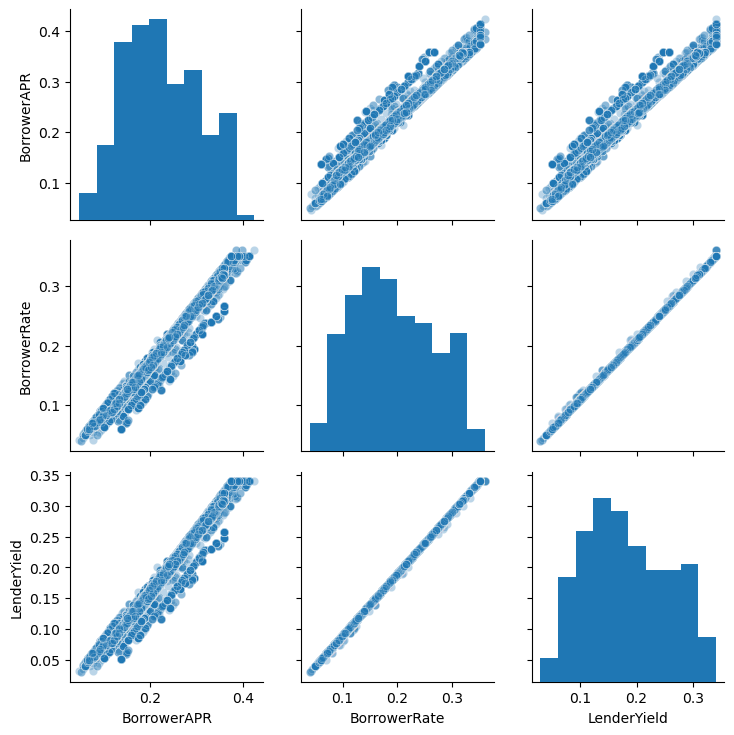

In [50]:
sb.reset_defaults()
variables = ["BorrowerAPR","BorrowerRate","LenderYield"]
g = sb.PairGrid(data = loan_clean, vars = variables)
g.map_diag(plt.hist)
g.map_offdiag(sb.scatterplot, alpha=0.3);

From the scatter plot of BorrowerAPR, BorrowerRate and LenderYield, we can see that there is a linear relationship between these variables. The values in all distribution appears to be spread out across the plot. From this graph will can say that the effect on any variable on BorrowerAPR will likely have the same effect on BorrowersRate and Lender yield. 

#### Relationship Between BorrowersAPR and Credit Score

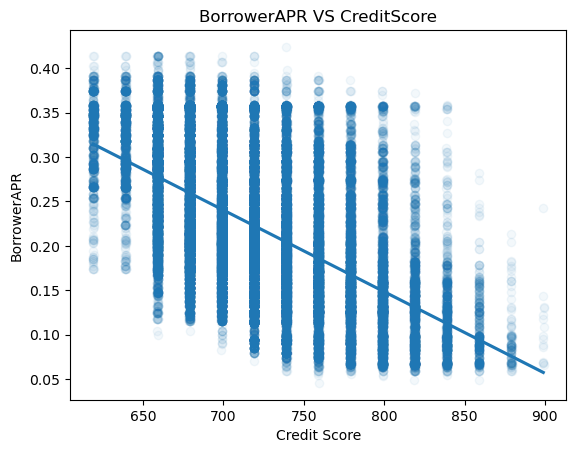

In [51]:
sb.reset_defaults()
sb.regplot(data=loan_clean, x="CreditScoreRangeUpper", y="BorrowerAPR", x_jitter=0.3, scatter_kws={"alpha": 1/20})
plt.title("BorrowerAPR VS CreditScore")
plt.xlabel("Credit Score");

There seems to be a negative correlation between BorrowersAPR and Credit score, this means as high Credit Scores have low BorrowerAPR. 

#### BorrowersAPR Relationship with Monthly Income

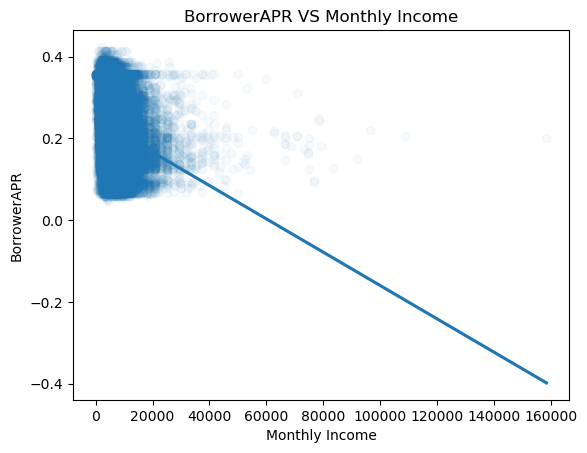

In [52]:
sb.reset_defaults()
g = sb.regplot(data=loan_clean, x="StatedMonthlyIncome", y="BorrowerAPR", x_jitter=0.3, scatter_kws={"alpha": 1/30}, ci=None)
g.set(title="BorrowerAPR VS Monthly Income", xlabel="Monthly Income");

There is also a negative correlation between Monthly Income and BorrowerAPR. Borrowers who earn more monthly seems to have a lower BorrowerAPR

#### BorrowersAPR Relationship with DebtToIncome Ratio

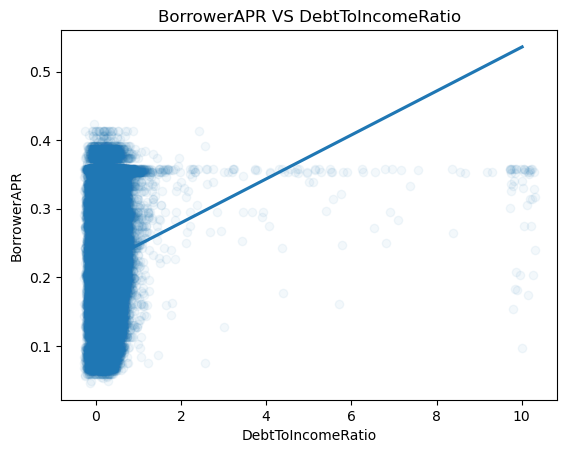

In [54]:
g = sb.regplot(data=loan_clean, x="DebtToIncomeRatio", y="BorrowerAPR", x_jitter=0.3, scatter_kws={"alpha": 1/20}, ci=None,)
g.set(title="BorrowerAPR VS DebtToIncomeRatio", xlabel="DebtToIncomeRatio");

The regression plot line shows a positive correlation but we can not really see the linear relationship between them. so it will be a good idea to transform the DebtToIncomeRatio.

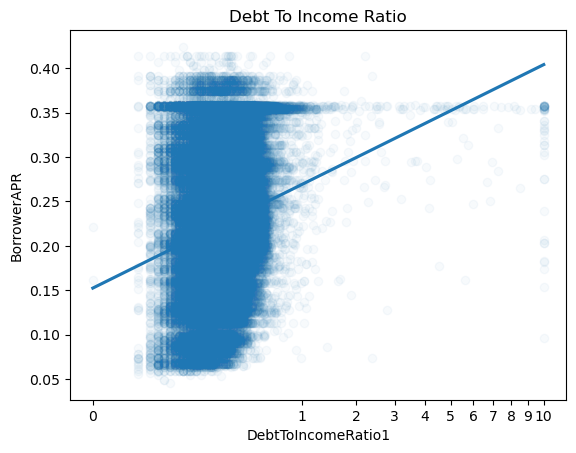

In [55]:
## use the FUNCTION FOR the cube root and its inverse
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

loan_clean['DebtToIncomeRatio1'] = loan_clean['DebtToIncomeRatio'].apply(cuberoot_trans)
sb.regplot(data=loan_clean, y="BorrowerAPR", x='DebtToIncomeRatio1', scatter_kws={"alpha":1/30}, ci=None)
#ticks = [0, 25000, 50000, 75000, 100000]
ticks =np.arange(0, 10+1, 1)
plt.xticks(cuberoot_trans(np.array(ticks)), ticks)
plt.title("Debt To Income Ratio");

Most of the data fall in a large blob between 0 and 1 30 Debt to income ratio and 0.05 to 0.40 BorrowerApr. Some transparency is added via 'alpha' to show the concentration of data. Interestingly, Most Debt To Income Ratio values above 1 seems to have high BorrowerAPR, This is made known by the direction of the regression line 

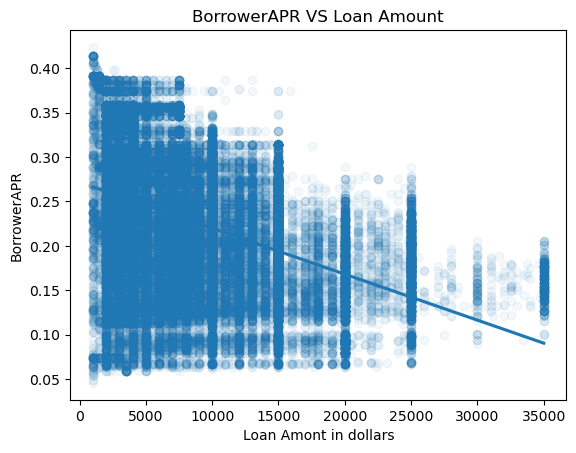

In [56]:
g = sb.regplot(data=loan_clean, y="BorrowerAPR", x='LoanOriginalAmount', scatter_kws={"alpha":1/20}, ci=None)
g.set(title="BorrowerAPR VS Loan Amount", xlabel="Loan Amont in dollars");

There are few Borrowers who borrow above 25000 dollars and they have a lower values of BorrowerAPR all below 0.25 than most of the of the borrowers who borrowed below 25000 dollars, The direction of the regression line indicates that there is a negative correlation. There could also be a reason for this, lets visualize loanamount against montly income to see if borrowers who earn more will borrow more.

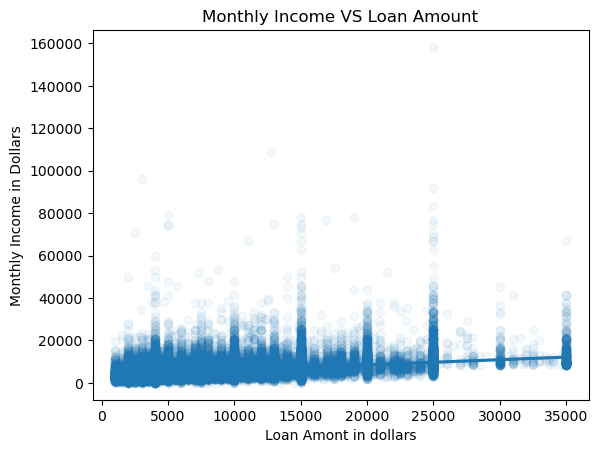

In [57]:
g = sb.regplot(data=loan_clean, y="StatedMonthlyIncome", x='LoanOriginalAmount', scatter_kws={"alpha":1/20}, ci=None)
g.set(title="Monthly Income VS Loan Amount", xlabel="Loan Amont in dollars", ylabel="Monthly Income in Dollars");

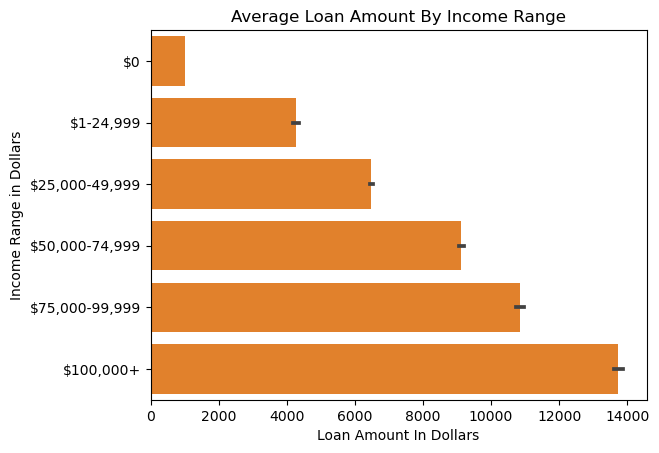

In [58]:
sb.barplot(data=loan_clean, y="IncomeRange", x="LoanOriginalAmount", color=base_color)
plt.title("Average Loan Amount By Income Range")
plt.xlabel("Loan Amount In Dollars")
plt.ylabel("Income Range in Dollars");

The visualization above comfirms our assumption that Borrowers who earn more tend to borrow more since there is a positive correlation.

#### Average BorrowerAPR by HomeOwnership

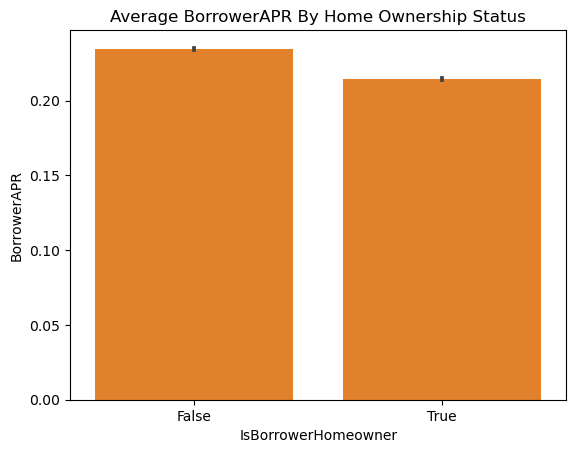

In [59]:
sb.barplot(data=loan_clean, x="IsBorrowerHomeowner", y="BorrowerAPR", color=base_color,)
plt.title("Average BorrowerAPR By Home Ownership Status");

Borrowers who had are not homeoeners had a high average BorrowerAPR although the difference between Average BorrowerAPR of home owners and non home owners was not much.

#### Average BorrowerAPR By Prosper Rating

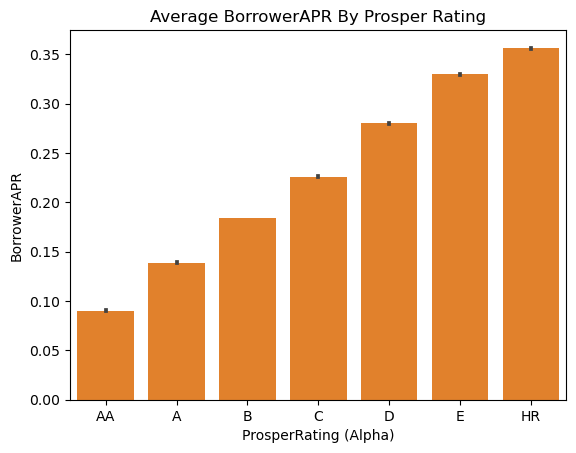

In [60]:
sb.barplot(data=loan_clean, x="ProsperRating (Alpha)", y="BorrowerAPR", color=base_color)
plt.title("Average BorrowerAPR By Prosper Rating");

From the plot above "AA" had the lowest  Average "BorrowersAPR". The average BorrowerAPR kept increasing as the level of risk increases.

#### Average Borrower APR By Income Range

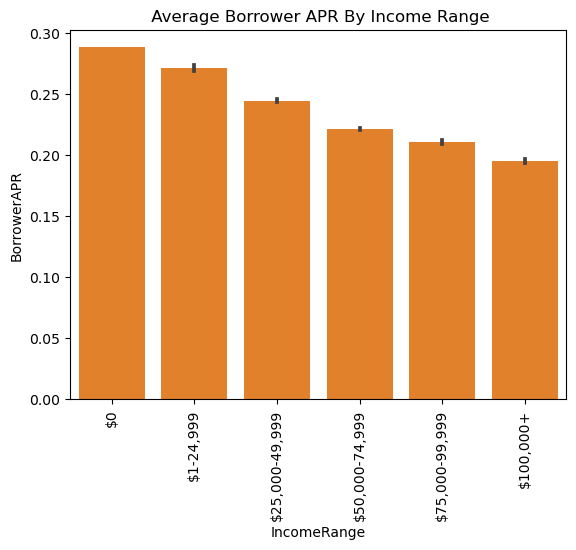

In [61]:
sb.barplot(data=loan_clean, x="IncomeRange", y="BorrowerAPR", color=base_color)
plt.title(" Average Borrower APR By Income Range")
plt.xticks(rotation=90);

Those who earn less have a high average "BorrowerAPR", The income range of \$ 100000 had the the lowest average of BorrowerAPR.

#### Average Monthly Income by Prosper Rating

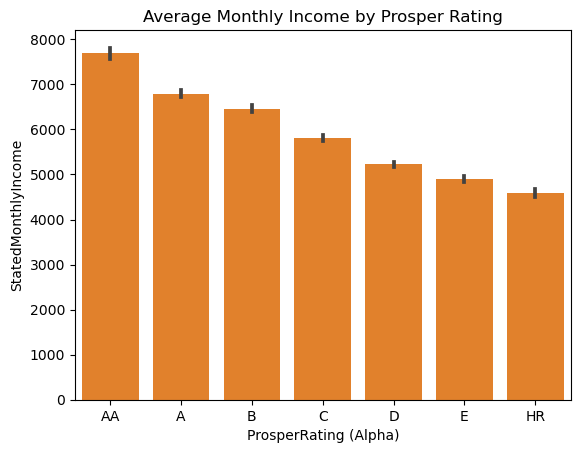

In [62]:
sb.barplot(data=loan_clean, x="ProsperRating (Alpha)", y="StatedMonthlyIncome", color=base_color)
plt.title("Average Monthly Income by Prosper Rating");

From the bar chart above, Rating AA had the average Monthly income, This means those with Borrowers earn more are scored with low risk for investors. This mean that income can be a good feature to predict if a borrower will have a low risk Prosper Rating.

#### Average Current Delinquencies on Prosper Rating

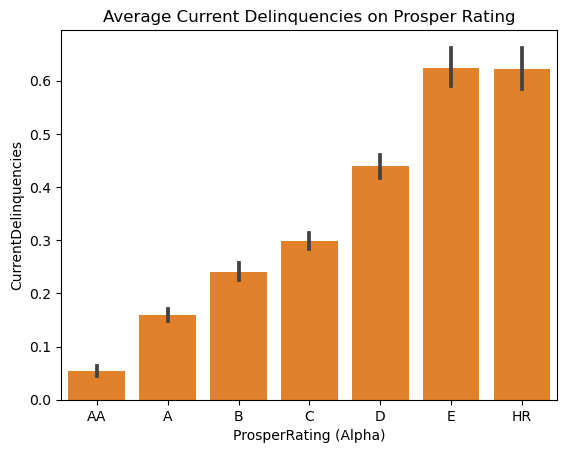

In [63]:
sb.barplot(data=loan_clean, x="ProsperRating (Alpha)", y="CurrentDelinquencies", color=base_color)
plt.title("Average Current Delinquencies on Prosper Rating");

We can see that rating "AA" had the lowest average number of current deliquencies on and those with highest risk "E" and "HR" had the lowest average number of current deliquencies.

#### Prosper Rating By Home Ownership

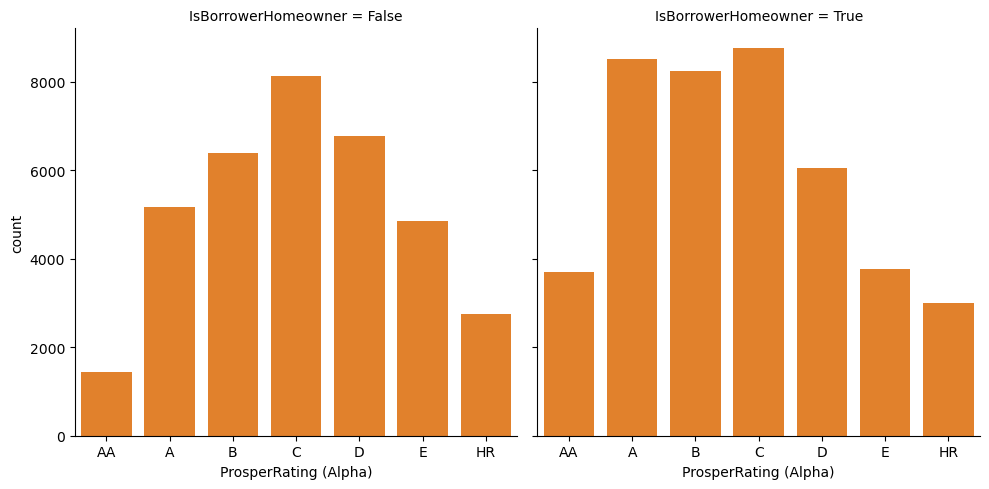

In [64]:
sb.catplot(data=loan_clean, x="ProsperRating (Alpha)", col="IsBorrowerHomeowner", kind="count", color=base_color);

##### Borrowers who are not Home Owners
"AA" Prosper Rating had the lowest count of borrowers of below 2000, Suprisingly Rating "E" and "HR" which are ratings of high risk loans had a less count of borrowers of non Home Ownners than Rating A, B, C, D and the rating C had the highest counts of Borrowers who are not home owners.
##### Borrowers who are  Home Owners
Interestingly, All Rating except "HR"(High Risk) have higher count of home owners than AA (lowest Risk) which is the rating. Rating A, B and C  had close count of homeowners with C g=having the highest count of homeowners.

#### Average Credit Score By Prosper Rating

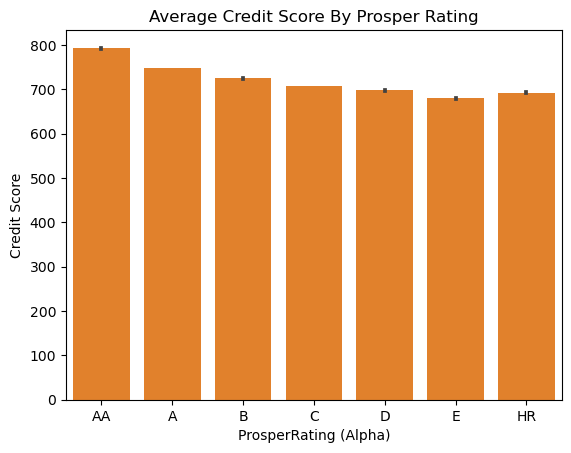

In [65]:
sb.barplot(data=loan_clean, x="ProsperRating (Alpha)", y="CreditScoreRangeUpper", color=base_color)
plt.ylabel("Credit Score")
plt.title("Average Credit Score By Prosper Rating");

Low risk ratings had high average Credit scores. The Credit score Average kept reducing as Risk increased

#### Average Debt To Income Ratio Against Prosper Rating

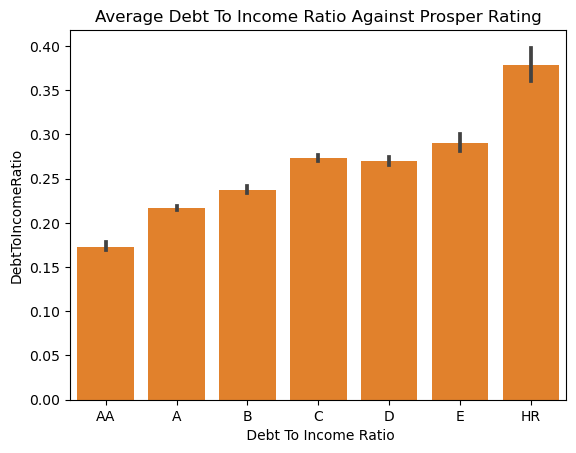

In [66]:
sb.barplot(data=loan_clean, x="ProsperRating (Alpha)", y="DebtToIncomeRatio", color=base_color)
plt.title("Average Debt To Income Ratio Against Prosper Rating")
plt.xlabel(" Debt To Income Ratio");


#### Investors by Credit Score

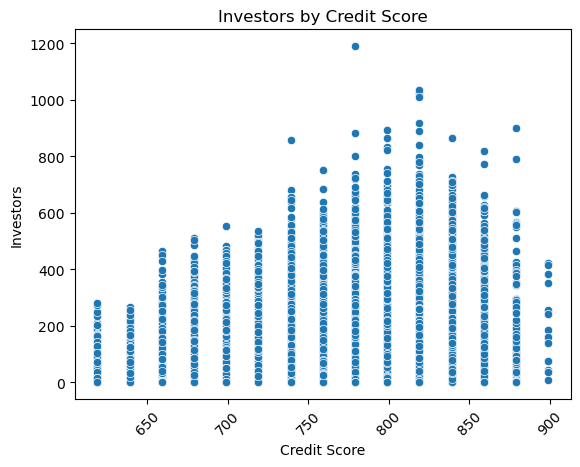

In [67]:
sb.scatterplot(data= loan_clean, x="CreditScoreRangeUpper", y="Investors")
plt.title("Investors by Credit Score")
plt.xlabel("Credit Score")
plt.xticks(rotation=45);

The visualisation above shows that there more numbers of investors for borrowers with credit score above 760, Low credit scores had investors values between 0 to 600. Highr credit scores had investors values between 0 to 1200. Lets see if investors will have the same effect as Credit score on Borrower APR

#### BorrowerAPR By Investors

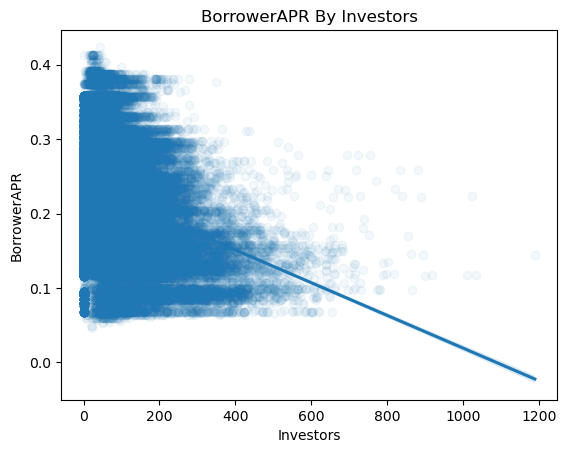

In [68]:
sb.regplot(data= loan_clean, y="BorrowerAPR", x="Investors", scatter_kws={"alpha": 1/20})
plt.title("BorrowerAPR By Investors");

There is a negative correlation between Borrower APR and Investors.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> BorrowerAPR had a  high amount of correlation with the BorrowerRate and LenderYield, and there was not a need to tranform any of the features and this means that these variables are associated that is what affects one could also affect the others. An approximately linear relationship was observed when BorrowerAPR and DebtToIncomeRatio was plotted with a cube-root transform. The scatterplot that came out of this also suggested that most of DebtToIncome Ratio are between 0 and 1. 

>The Average BorrowerAPR increased as Prosper Risk Rating increased this was plotted on a adaptive bar chart this could mean that borrowers APR is determined by the risk associated with the borrower and with further investigation it was still suggested, as high income range had low Borrowers APR Aand The lowest risk rating "AA" had the highest average monthly income.

> There is a negative correlation between BorrowerAPR and Credit scores, As borrowers high credit scores tend to have low Borrowers APR. 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> A negative correlation that was observed between loan amount and BorrowersAPR, this was surprising as one will think high borrowersAPR will be associated with high loan amounts but neither. This was ivestigated further by checking to see if there was any correlation between Loan amount and Monthly income , and it was found that was a positive correlation between monthly income and loan amount, This means that it that borrowers who earn more also borrow more. .

## Multivariate Exploration

> Here we Create plots of three or more variables to investigate your data even
further. we will look at BorrowersAPR realtionship with Credit scores, Debt to income ratio, Home Ownership, ProsperRating and Investors.


#### Distribution of BorrowerAPR and Credit Score By Prosper Rating

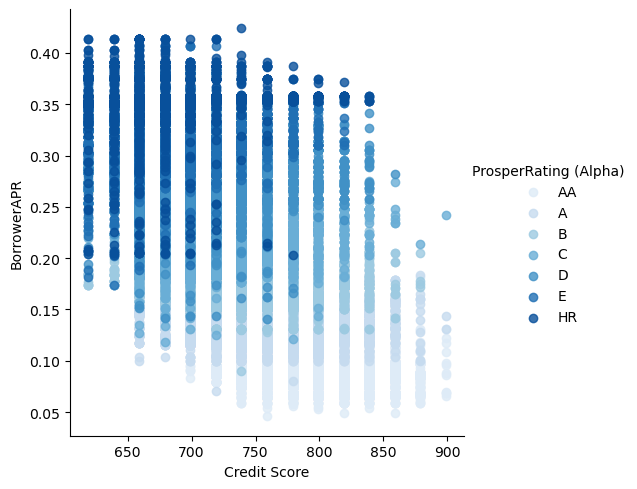

In [69]:
sb.lmplot(data= loan_clean, x="CreditScoreRangeUpper", y="BorrowerAPR", fit_reg=False, hue="ProsperRating (Alpha)",palette="Blues")
plt.xlabel("Credit Score");

This scattter plot with color encoding for prosper rating. The color palette moves from low risk(light colors) to high risk(dark colors). Borrowers with low credit scores are associated with high risk and high BorrowerAPR and Borrowers with high credit score tend to have low risks and low borrower APR. Next we will look at the break down of each credit score usina a bar chart, with the average BOrrower APR on the y axis and Prosper Rating on the x axis using faceting

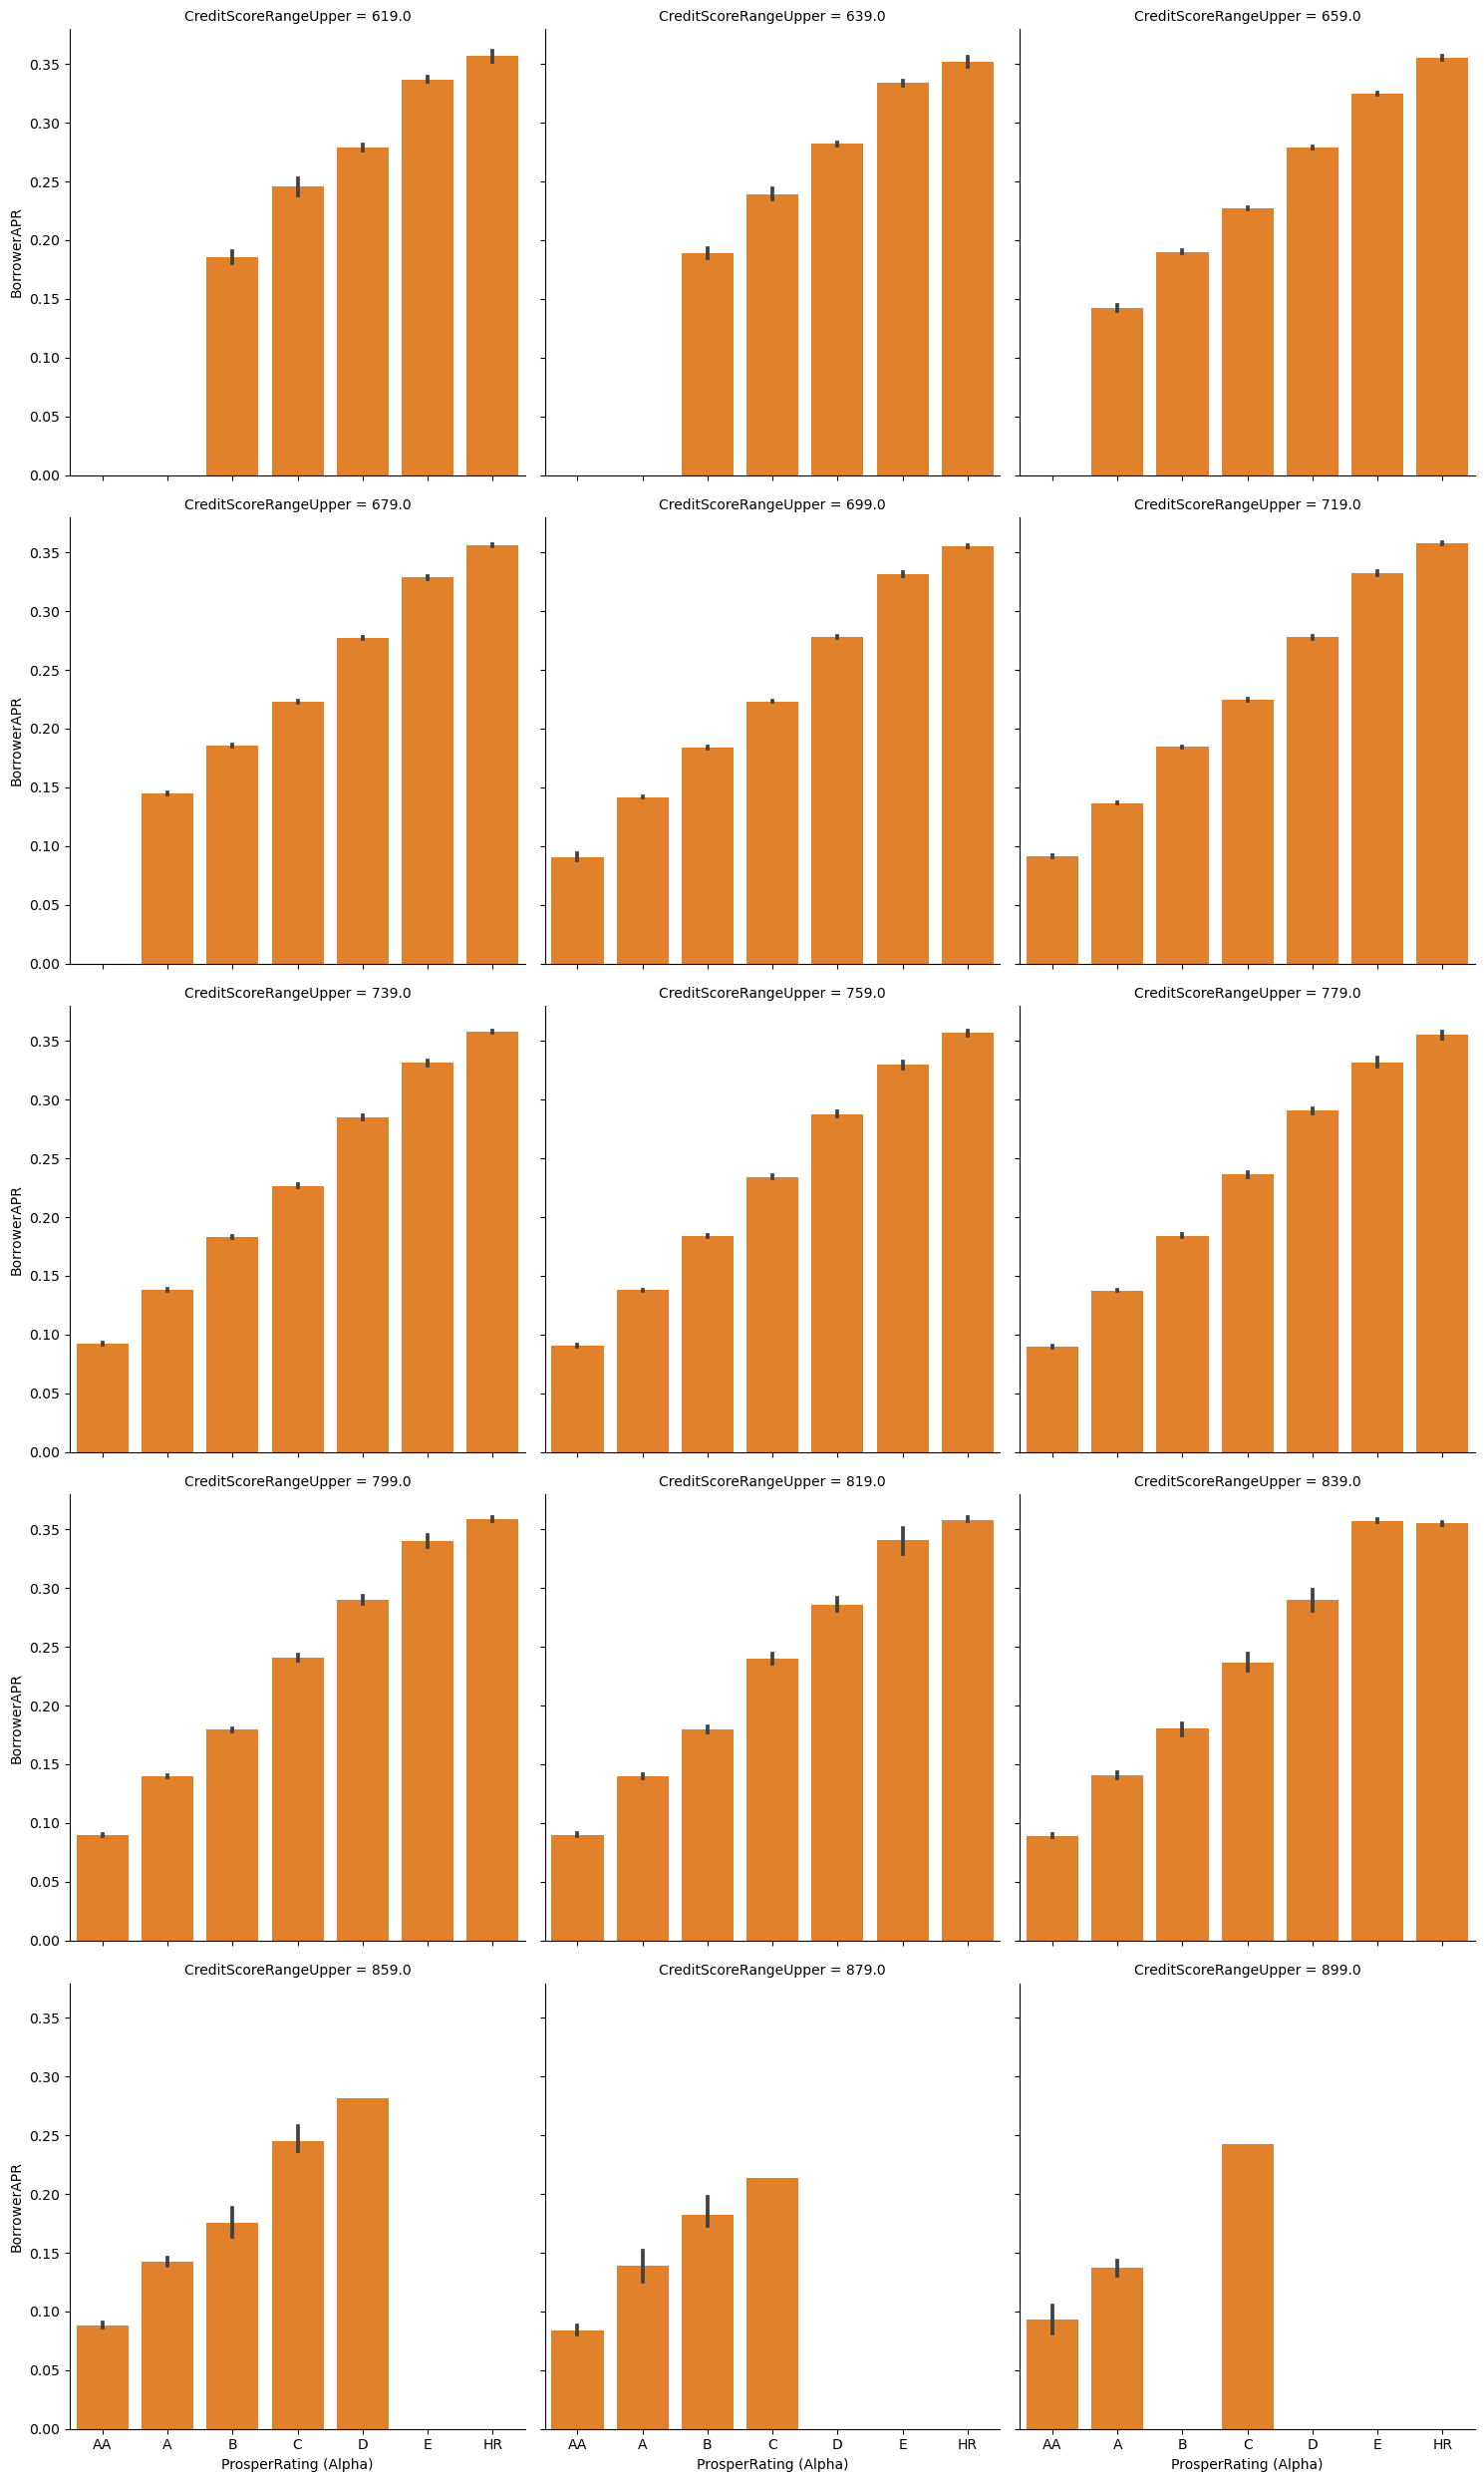

In [70]:
sb.catplot(data= loan_clean, col="CreditScoreRangeUpper", y="BorrowerAPR" ,col_wrap=3, x="ProsperRating (Alpha)", kind="bar", color=base_color);

This The two lowest scores did are not associated with lowest loan risk "AA" and "A" but the average BorrowersAPR kept increasing as Risk increased, also the two Highest Credit Scores had no values for HR, E,D which are ratings for high risk.

#### Distribution of BorrowerAPR and Credit Score By Home Ownership

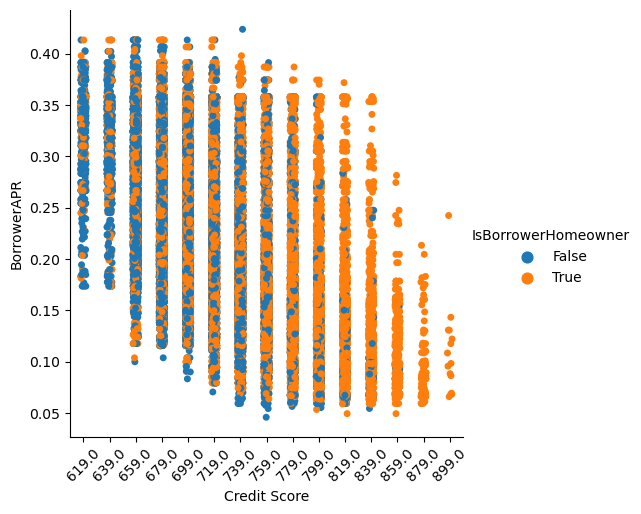

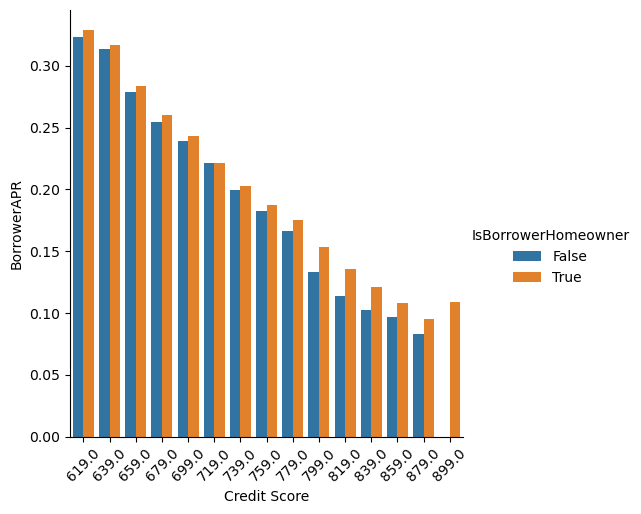

In [71]:

strip =sb.catplot(data= loan_clean, x="CreditScoreRangeUpper", y="BorrowerAPR", hue="IsBorrowerHomeowner")
plt.xticks(rotation=45)
plt.xlabel("Credit Score");
bar = sb.catplot(data= loan_clean, x="CreditScoreRangeUpper", y="BorrowerAPR", hue="IsBorrowerHomeowner", kind="bar", ci=None)
plt.xticks(rotation=45)
plt.xlabel("Credit Score");

From the stripplot the non home owners are found mostly around borrowers with low credit scores , as credit score increases the number of non homers reduces and the borrowers APR reduces. Although Borrowers who are home oeners had a higher average Borrower APR but the average kept reduces as the credit inreased.

#### #### Distribution of BorrowerAPR and Debt To Income Ratio By Prosper Rating

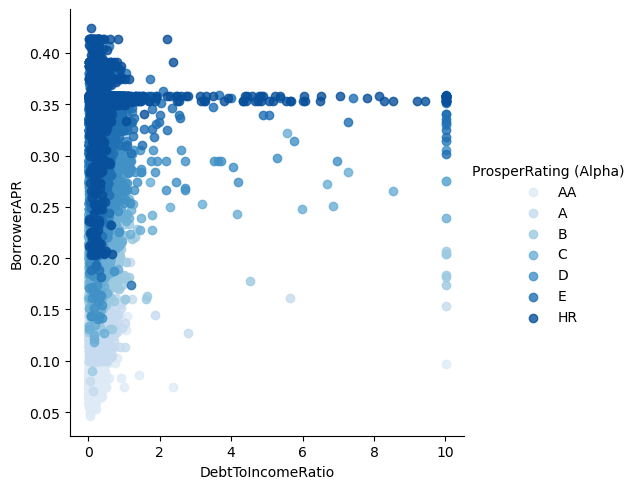

In [72]:
sb.lmplot(data= loan_clean, x="DebtToIncomeRatio", y="BorrowerAPR", fit_reg=False, hue="ProsperRating (Alpha)",palette="Blues");

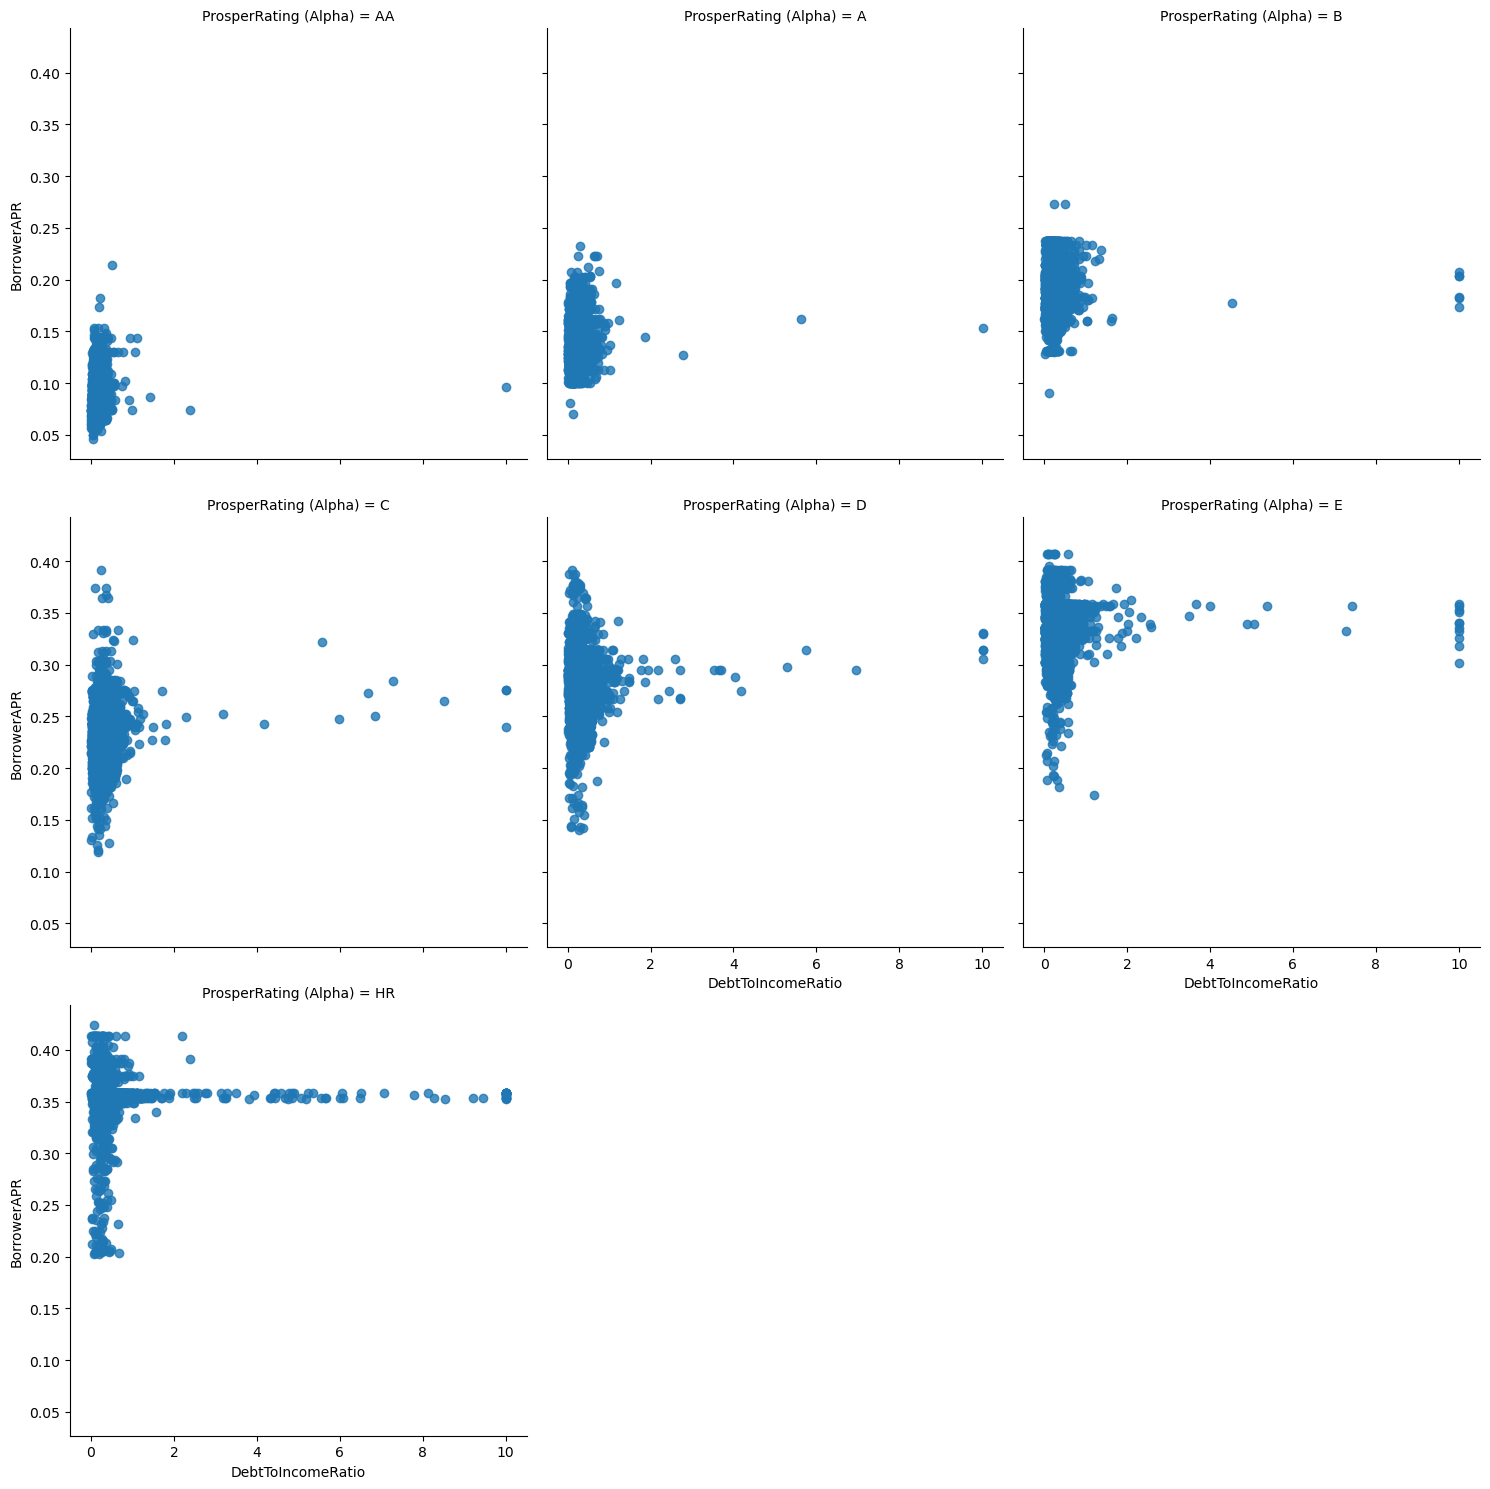

In [73]:
sb.lmplot(data= loan_clean, x="DebtToIncomeRatio", y="BorrowerAPR", col_wrap=3 , col="ProsperRating (Alpha)", fit_reg=False);


Frome our visualizations low ratings AA to B had low debt to income ratio values with less values above 1, and they had their values between 0 and 0.25 for BorrowerAPR. high ratings of C to HR had mores value of 1 for Debt to income ratio and values of BorrowerAPR 0.20 to 0.4.

#### BorrowerAPR and Investors By Prosper Rating

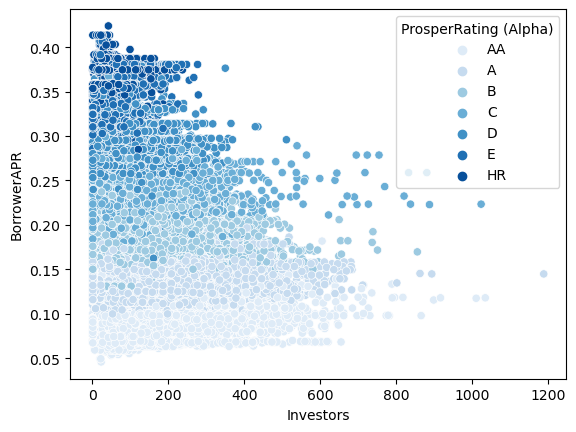

In [74]:
sb.scatterplot(data= loan_clean, y="BorrowerAPR", x="Investors", hue="ProsperRating (Alpha)", palette="Blues");

There are more numbers of of investors in the low risk ratings, and as the risk increases the spread for investors reduces.

#### Credit score and Proper Rating By Income Range

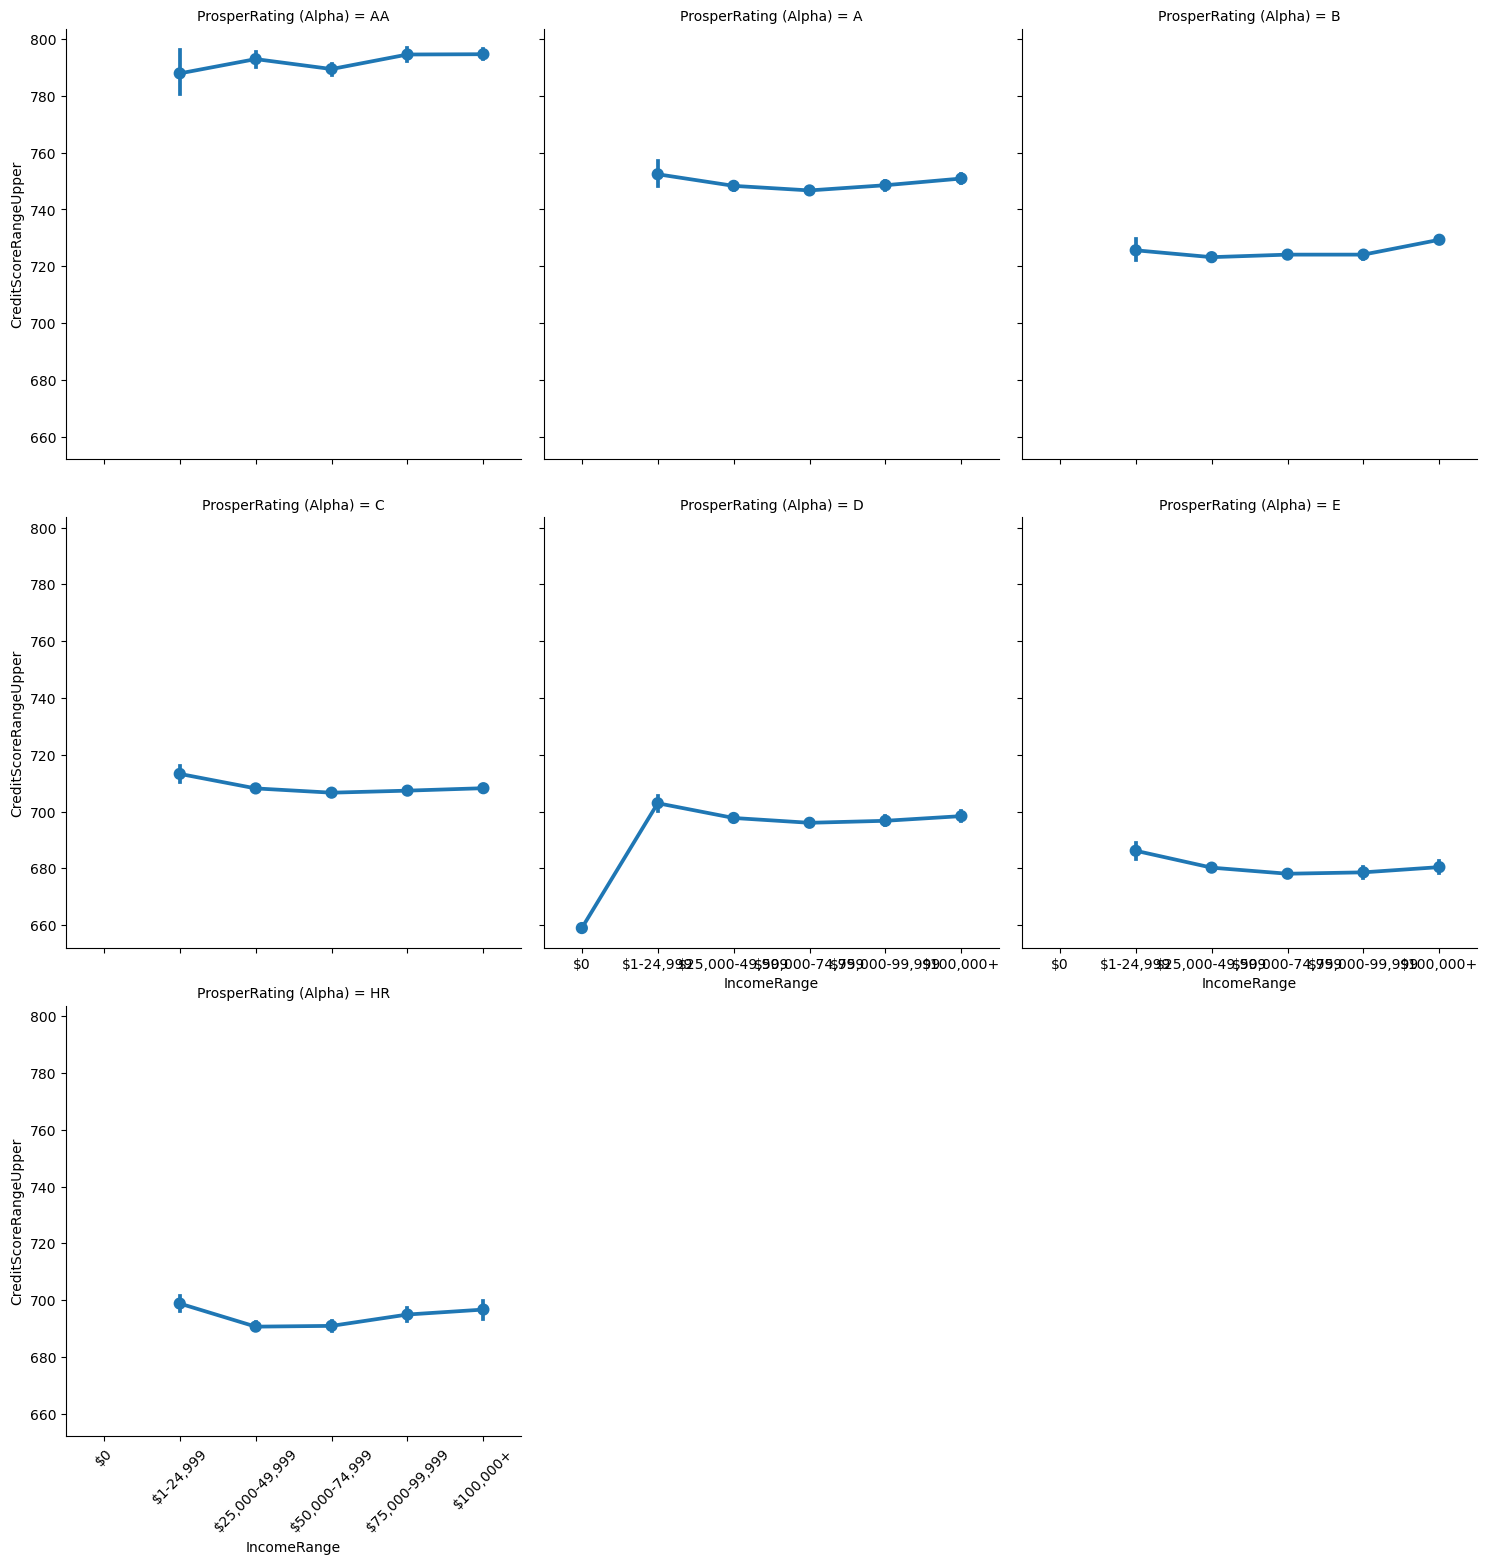

In [75]:

sb.catplot(data= loan_clean, x="IncomeRange", y="CreditScoreRangeUpper" ,col_wrap=3, col="ProsperRating (Alpha)", kind="point")
#, color=base_color)
plt.xticks(rotation=45);

Prosper Rating and Credit Score are related as high credit scores were asscociated low risks for all income ranges.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I investigated the realtionship Borrowers APR AND credit scores by looking at the effect of Prosper Rating and home Ownership, For Prosper Rating low Borrowers Apr were associated with low risk rating and high credit scores. For home ownership High Credit score Borrowers had borrowers that own homes, and low credit score borrowers and more non home owners.

>I extended my investigation of BorrowerAPR against DebtToIncomeRatio in this section by looking at the impact of Prosper Rating a categorical variable. The multivariate exploration here showed that there indeed is a positive effect of increased Borrower APR on DebtToincome Ratio, Prosper Rating of low risk had low Borrowers Apr and more values in between 0 and 1 in the DebtToIncome Ratio. Also look at Average Borrowers APR against ProsperRating for each credit score, This The two lowest scores did are not associated with lowest loan risk "AA" and "A" but the average BorrowersAPR kept increasing as Risk increased, also the two Highest Credit Scores had no values for HR, E,D which are ratings for high risk.

### Were there any interesting or surprising interactions between features?

> An interesting interation was that the average BorrowerAPR and Credit score by homeownership surprising home owners had higher average that non home owners.

## Conclusions
> Borrower Annual Percentage Rate (APR) is affected mainly by the risk associated with the Borrower asking for the loan, And what plays a major role to determine that risk is Credit Score of the borrower. A better credit score that is high scores gives lenders and investors the impression that there less risk associated with the borrower and the loan, This will lead to a low Borrower APR and also more investors on the Prosper Loan listing. When the Borrower Credit Score is low, it suggests to lenders that there is a lot more risk associated with the borrower and the loan, This leads to a high Borrower APR and likely less investors.

> Prosper Rating is the score that Prosper uses to measure the risk associated with the loan, that is from the lowest risk to the highest  **AA - A - B - C - D - E - HR** , And the bar plot of Average Borrower APR suggests that the Borrowers with the low risks had low Borrowers APR, and the Borrowers APR increasing as the rating of risk increased, with HR having the highest Average Borrower APR. From the visualations above, it is safe to say that prosper likely uses income, Debt To Income Ratio, Credit Score, Current Delinquencies to determine the Prosper rating of each of the Borrower. And since Risk plays a important role in Borrower APR, features that are useful in predicting Prosper Rating are more likely to be used to predit the Borrower APR.

>  From the visualizations carried out in this Exploratory Analysis, Borrowers who have high income, high credit score, low Debt to income Ratio and low Number of delinquencies will have low risk rating associated with them and this will probably lead to low Borrower APR *While* Borrowers who have low income, low credit score, high Debt to income Ratio and high Number of delinquencies will have low risk rating associated with them and this will probably lead to high Borrower APR.

> With these we can say the features that will most likely predict Borrower APR and Prosper rating are Income, Credit Scores, Debt To Income Ratio and Current Delinquencies